<a href="https://colab.research.google.com/github/auroravicks/FL-Projects-/blob/main/Breast_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('breast_cancer.csv')
df.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Clump Thickness              683 non-null    int64
 1   Uniformity of Cell Size      683 non-null    int64
 2   Uniformity of Cell Shape     683 non-null    int64
 3   Marginal Adhesion            683 non-null    int64
 4   Single Epithelial Cell Size  683 non-null    int64
 5   Bare Nuclei                  683 non-null    int64
 6   Bland Chromatin              683 non-null    int64
 7   Normal Nucleoli              683 non-null    int64
 8   Mitoses                      683 non-null    int64
 9   Class                        683 non-null    int64
dtypes: int64(10)
memory usage: 53.5 KB


<Axes: >

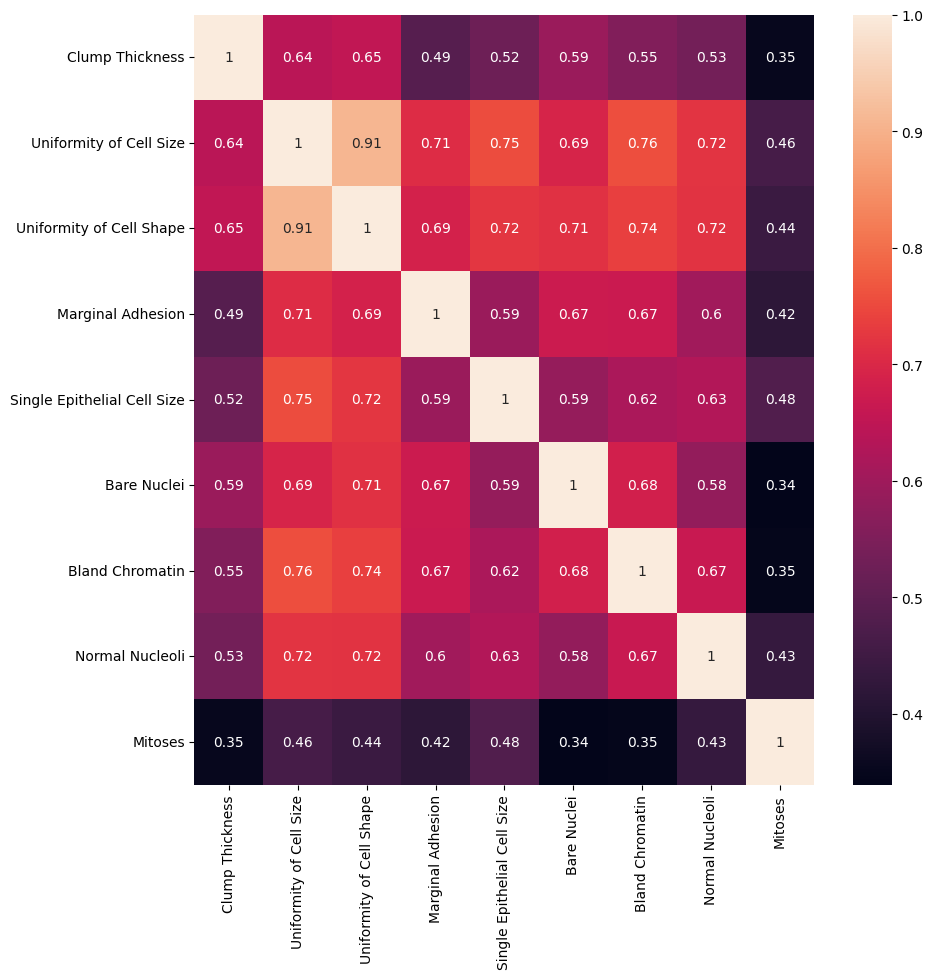

In [ ]:
plt.figure(figsize = (10,10))
d=df.drop('Class',axis=1)
sns.heatmap(d.corr(),annot = True)

<Figure size 1000x1000 with 0 Axes>

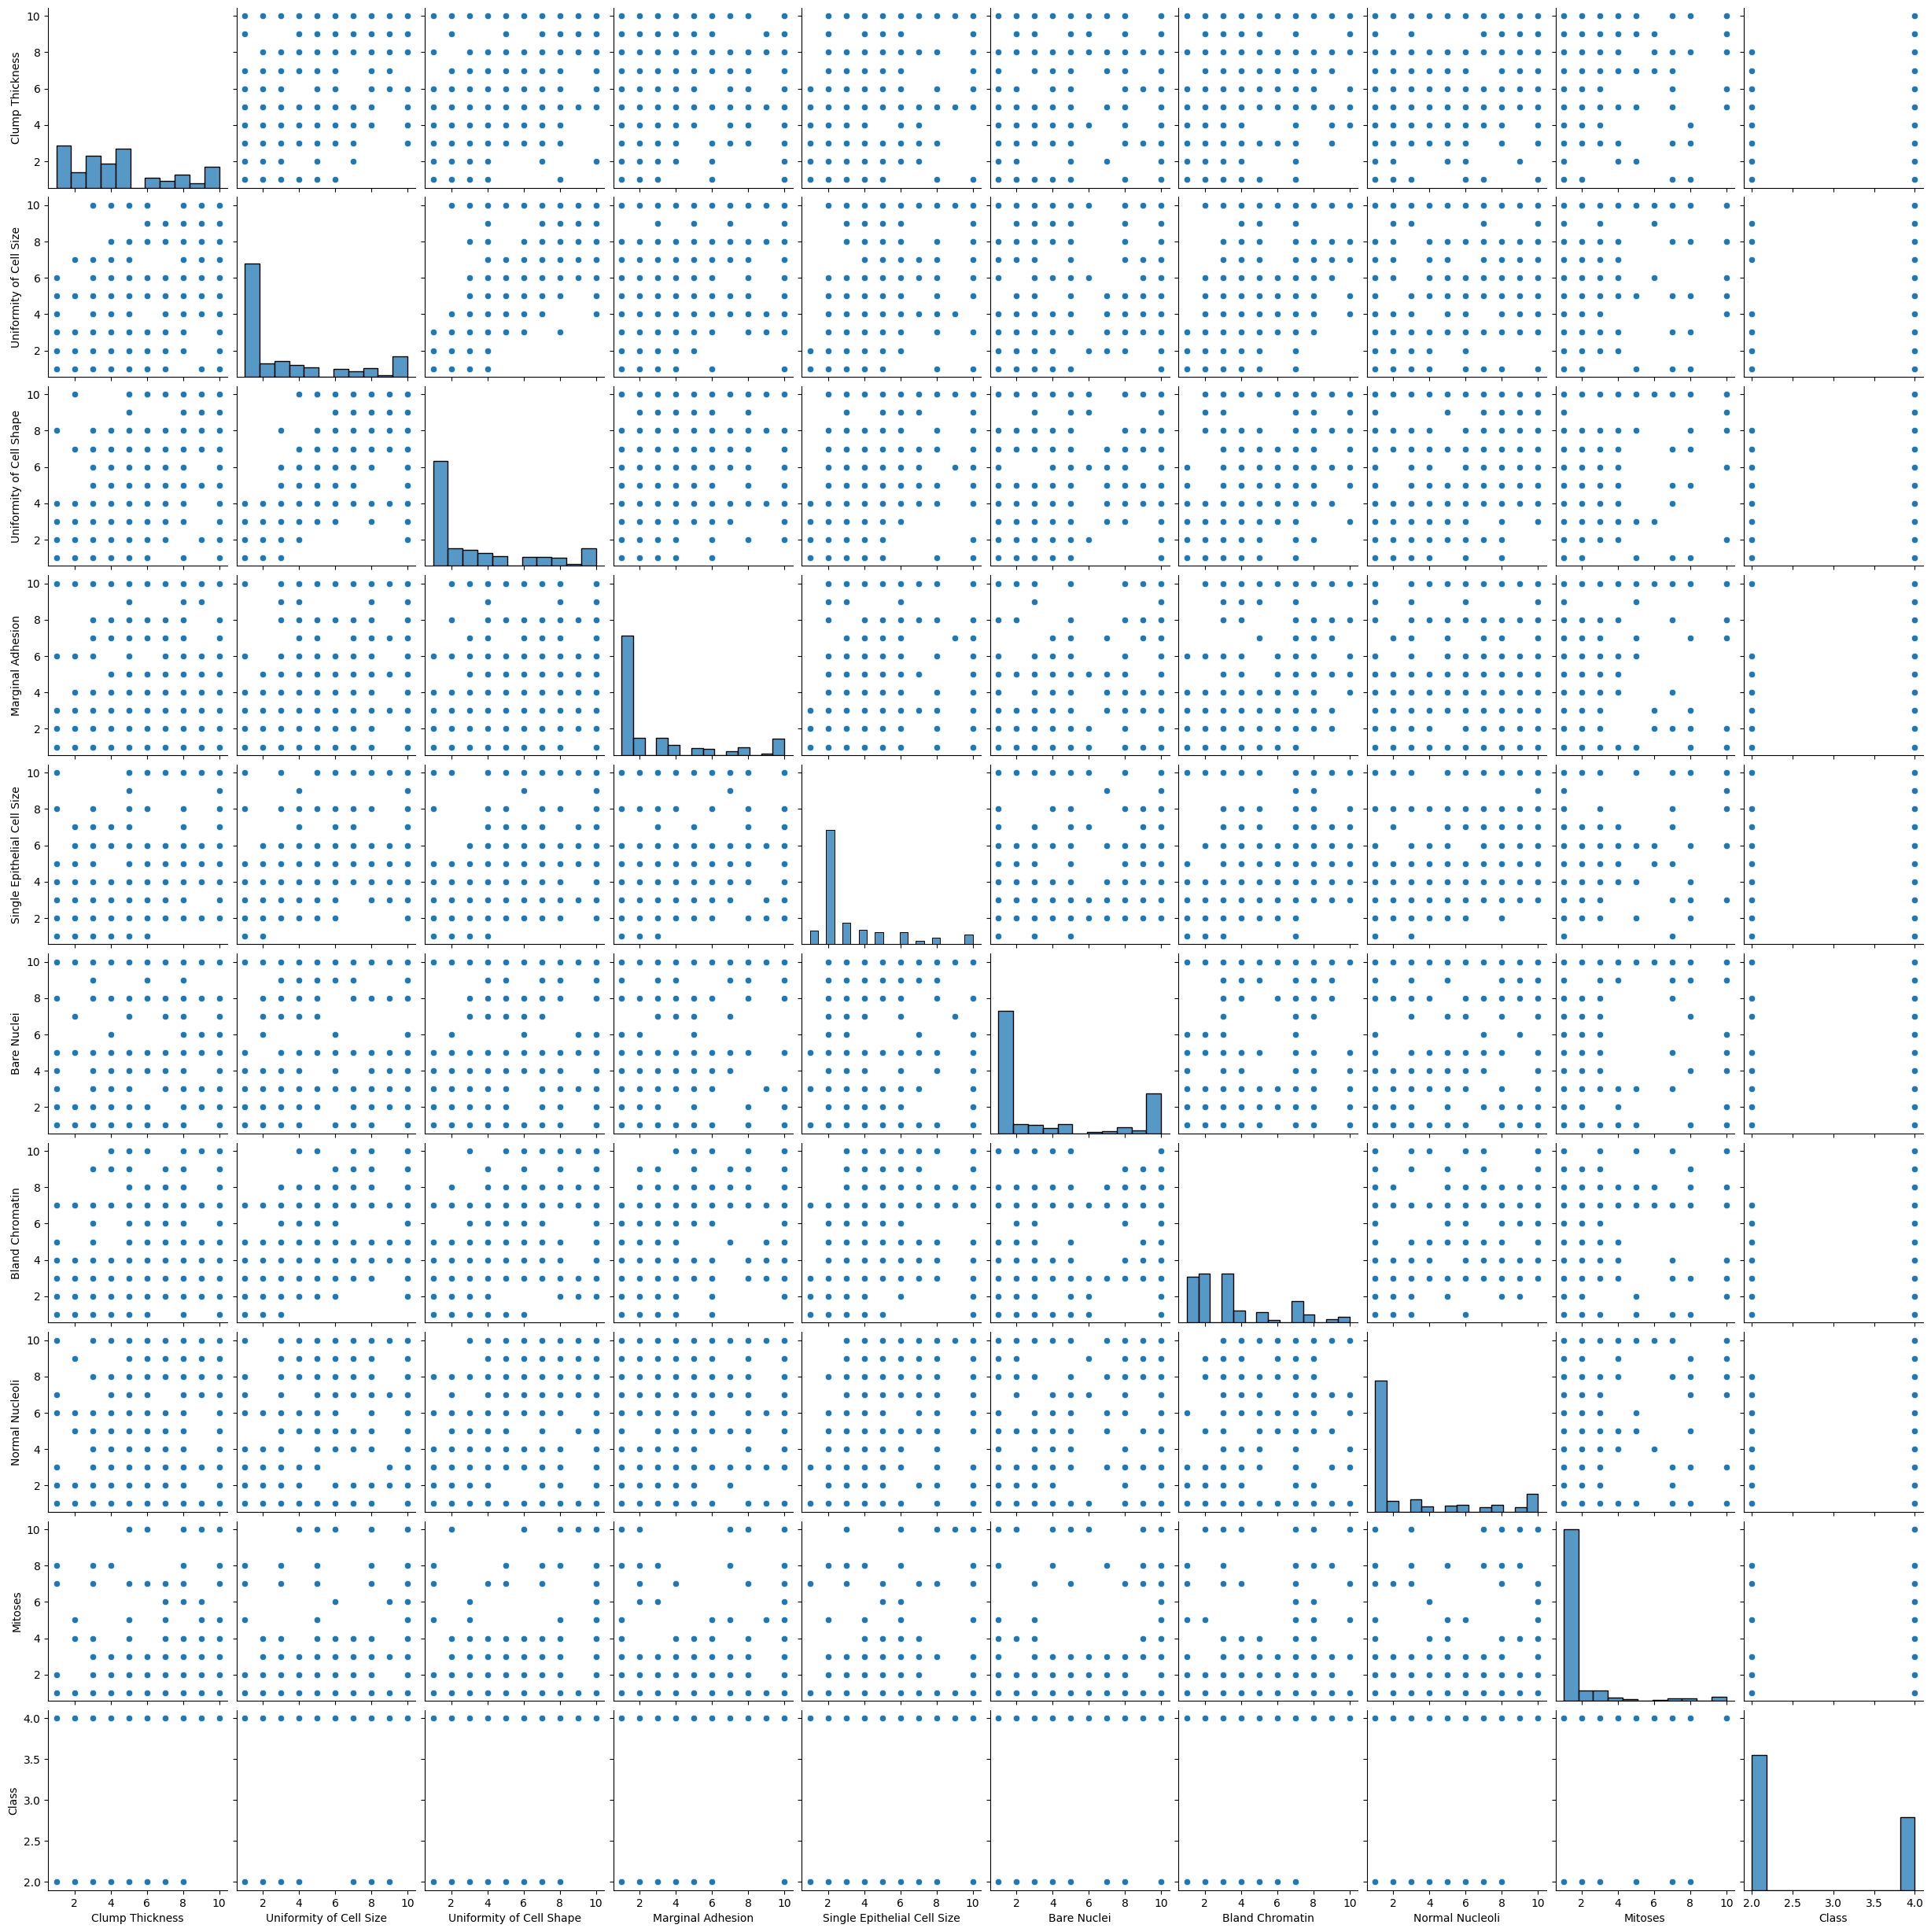

In [ ]:
plt.figure(figsize=(10,10))
d=df
sns.pairplot(d)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X=df.drop('Class',axis=1)
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X = sc_x.fit_transform(X)
y=df['Class']


In [ ]:
yx=[]
for i in y:
  if i==2:
    yx.append(0)
  else:
    yx.append(1)
y=yx
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 5)

In [ ]:
#linear svm
print('Linear Support Vector Machine')
from sklearn.svm import SVC
clf = SVC(kernel='linear')

clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix : \n", cm)
print ('Classification Report : ')
print (classification_report(y_test, y_pred))

Linear Support Vector Machine
Confusion Matrix : 
 [[129   4]
 [  4  68]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       133
           1       0.94      0.94      0.94        72

    accuracy                           0.96       205
   macro avg       0.96      0.96      0.96       205
weighted avg       0.96      0.96      0.96       205



In [ ]:
#svm non linear (radial basis function)
print('Non Linear Support Vector Machine-rbf')
from sklearn.svm import SVC
svnl = SVC(kernel='rbf')

svnl.fit(X_train, y_train)
y_pred=svnl.predict(X_test)

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix : \n", cm)
print ('Classification Report : ')
print (classification_report(y_test, y_pred))

Non Linear Support Vector Machine-rbf
Confusion Matrix : 
 [[129   4]
 [  4  68]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       133
           1       0.94      0.94      0.94        72

    accuracy                           0.96       205
   macro avg       0.96      0.96      0.96       205
weighted avg       0.96      0.96      0.96       205



In [ ]:
#logistic regression
print('Logistic Regression')
from sklearn.linear_model import LogisticRegression
logr= LogisticRegression(random_state = 7)
logr.fit(X_train, y_train)
y_pred=logr.predict(X_test)
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix : \n", cm)
print ('Classification Report : ')
print (classification_report(y_test, y_pred))

Logistic Regression
Confusion Matrix : 
 [[131   2]
 [  4  68]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       133
           1       0.97      0.94      0.96        72

    accuracy                           0.97       205
   macro avg       0.97      0.96      0.97       205
weighted avg       0.97      0.97      0.97       205



In [ ]:
#knn
print('Nearest Neighbours')
from sklearn.neighbors import KNeighborsClassifier
knn_clf=KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train,y_train)
y_pred=knn_clf.predict(X_test)

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix : \n", cm)
print ('Classification Report : ')
print (classification_report(y_test, y_pred))

Nearest Neighbours
Confusion Matrix : 
 [[128   5]
 [  4  68]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       133
           1       0.93      0.94      0.94        72

    accuracy                           0.96       205
   macro avg       0.95      0.95      0.95       205
weighted avg       0.96      0.96      0.96       205



In [ ]:
#decision tree
print('Decision Tree')
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train,y_train)
y_pred = dt_clf.predict(X_test)

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix : \n", cm)
print ('Classification Report : ')
print (classification_report(y_test, y_pred))

Decision Tree
Confusion Matrix : 
 [[127   6]
 [ 11  61]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       133
           1       0.91      0.85      0.88        72

    accuracy                           0.92       205
   macro avg       0.92      0.90      0.91       205
weighted avg       0.92      0.92      0.92       205



In [ ]:
#random forest
print('Random Forest')
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix : \n", cm)
print ('Classification Report : ')
print (classification_report(y_test, y_pred))

Random Forest
Confusion Matrix : 
 [[130   3]
 [  4  68]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       133
           1       0.96      0.94      0.95        72

    accuracy                           0.97       205
   macro avg       0.96      0.96      0.96       205
weighted avg       0.97      0.97      0.97       205



In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
print('XGBoost')
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train,y_train)

y_pred = xgb_model.predict(X_test)

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix : \n", cm)
print ('Classification Report : ')
print (classification_report(y_test, y_pred))


XGBoost
Confusion Matrix : 
 [[129   4]
 [  3  69]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       133
           1       0.95      0.96      0.95        72

    accuracy                           0.97       205
   macro avg       0.96      0.96      0.96       205
weighted avg       0.97      0.97      0.97       205



In [ ]:
#basic neural network
print('Multi Layer Perceptron')
from sklearn.neural_network import MLPClassifier
nn=MLPClassifier(solver='sgd', alpha=1e-5,hidden_layer_sizes=(4,4,4), random_state=1)
nn.fit(X_train,y_train)
y_pred=nn.predict(X_test)
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix : \n", cm)
print ('Classification Report : ')
print (classification_report(y_test, y_pred))

Multi Layer Perceptron
Confusion Matrix : 
 [[129   4]
 [  1  71]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       133
           1       0.95      0.99      0.97        72

    accuracy                           0.98       205
   macro avg       0.97      0.98      0.97       205
weighted avg       0.98      0.98      0.98       205



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
